## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob



TensorFlow 2.x selected.


Using TensorFlow backend.


In [2]:
tf.__version__

'2.1.0'

In [0]:
# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targetsc

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
label_df=pd.read_csv("labels.csv")

In [11]:
label_df

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


### Print the count of each category of Dogs given in the dataset



In [12]:
label_df['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
golden_retriever         67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

### Get one-hot encodings of labels

In [0]:
en_label_df=label_df

In [0]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(en_label_df['breed'])
# Drop column breed as it is now encoded
en_label_df = en_label_df.drop('breed',axis = 1)
# Join the encoded df
en_label_df = en_label_df.join(one_hot)


In [15]:
en_label_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000bec180eb18c7604dcecc8fe0dba07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,001513dfcb2ffafc82cccf4d8bbaba97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,001cdf01b096e06d78e9e5112d419397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00214f311d5d2247d5dfe4fe24b2303d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0021f9ceb3235effd7fcde7f7538ed62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_row=128
img_col=128
num_channel=1

In [17]:
from tqdm import tqdm
import cv2
x_train=[]
y_train=[]

for f,img in tqdm(label_df.values):
  train_img=cv2.imread('./train/{}.jpg'.format(f),1)
  train_img_resize=cv2.resize(train_img,(img_row,img_col))
  x_train.append(train_img_resize)
  y_train.append(img)

100%|██████████| 10222/10222 [00:26<00:00, 379.88it/s]


Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

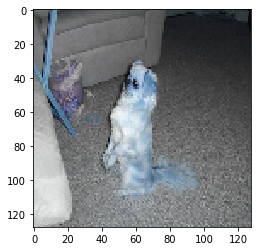

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])

In [19]:
y_train[2]

'pekinese'

In [0]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)

In [21]:
y_train[2]

85

In [0]:
np.shape(x_train)
np.shape(y_train)
x_train = np.array(x_train).astype('float32')

In [23]:
normed_x_train = x_train /255
np.shape(normed_x_train)

(10222, 128, 128, 3)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train_new, x_val, y_train_new, y_val = train_test_split(normed_x_train, y_train, test_size=0.2, random_state=1)

In [51]:
x_train_new.shape


(8177, 128, 128, 3)

In [52]:
x_val.shape

(2045, 128, 128, 3)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [27]:
sample = pd.read_csv('sample_submission.csv')
sample.head(5)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [28]:
test_img = sample['id']
test_img[0]

'000621fb3cbb32d8935728e48679680e'

Run the below code to load the test image files in x_test_feature

In [0]:
img_rows=128
img_cols=128
num_channel=1

In [30]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:12<00:00, 803.84it/s]


Normalize the test data and convert it into 4 dimensions

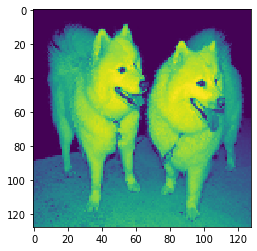

In [31]:
plt.imshow(x_test_feature[1])

In [0]:
import numpy as np
x_test_feature = np.array(x_test_feature).astype('float32')
x_test_feature /= 255

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

In [0]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(16, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu',input_shape=(128,128,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D())



#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
#normalize data
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
#normalize data
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D())

#Flatten the output
model.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model.add(tf.keras.layers.Dense(256, activation='relu'))


model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(120, activation='softmax'))

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0

### Use batch_size = 128 and epochs = 10 and execute the model

In [58]:
#Training the model
model.fit(x_train_new,y_train_new, validation_data=(x_val,y_val), epochs=10, batch_size=128)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 4s 476us/sample - loss: 4.8191 - accuracy: 0.0135 - val_loss: 4.7639 - val_accuracy: 0.0137
Epoch 2/10
8177/8177 [==============================] - 3s 399us/sample - loss: 4.5698 - accuracy: 0.0345 - val_loss: 4.6628 - val_accuracy: 0.0298
Epoch 3/10
8177/8177 [==============================] - 3s 397us/sample - loss: 4.2872 - accuracy: 0.0596 - val_loss: 4.5531 - val_accuracy: 0.0416
Epoch 4/10
8177/8177 [==============================] - 3s 395us/sample - loss: 3.9227 - accuracy: 0.1108 - val_loss: 4.4639 - val_accuracy: 0.0533
Epoch 5/10
8177/8177 [==============================] - 3s 400us/sample - loss: 3.3717 - accuracy: 0.2017 - val_loss: 4.3783 - val_accuracy: 0.0533
Epoch 6/10
8177/8177 [==============================] - 3s 398us/sample - loss: 2.5927 - accuracy: 0.3603 - val_loss: 4.4259 - val_accuracy: 0.0582
Epoch 7/10
8177/8177 [==============================] - 3s 396us

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2, shear_range=0.2,zoom_range=0.3,
                                                               horizontal_flip=True,
                                                               validation_split=0.2)

In [0]:
img_generator.fit(x_train_new)

In [61]:
model.fit_generator(img_generator.flow(x_train_new, y_train_new, batch_size=32),
                    steps_per_epoch=len(x_train_new)/32, epochs=10)

  ...
    to  
  ['...']
Train for 255.53125 steps
Epoch 1/10
256/255 [==============================] - 27s 106ms/step - loss: 4.7131 - accuracy: 0.0235
Epoch 2/10
256/255 [==============================] - 27s 105ms/step - loss: 4.5680 - accuracy: 0.0289
Epoch 3/10
256/255 [==============================] - 27s 106ms/step - loss: 4.4980 - accuracy: 0.0341
Epoch 4/10
256/255 [==============================] - 27s 105ms/step - loss: 4.4403 - accuracy: 0.0396
Epoch 5/10
256/255 [==============================] - 27s 107ms/step - loss: 4.3834 - accuracy: 0.0441
Epoch 6/10
256/255 [==============================] - 27s 106ms/step - loss: 4.3346 - accuracy: 0.0493
Epoch 7/10
256/255 [==============================] - 27s 105ms/step - loss: 4.3005 - accuracy: 0.0560
Epoch 8/10
256/255 [==============================] - 27s 106ms/step - loss: 4.2694 - accuracy: 0.0583
Epoch 9/10
256/255 [==============================] - 27s 106ms/step - loss: 4.2167 - accuracy: 0.0662
Epoch 10/10
256/255 [=

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator = img_generator.flow(x_train_new, y_train_new, batch_size=32)
val_generator = img_generator.flow(x_val, y_val, batch_size=32)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('Dogbreeds.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose=1)

In [64]:
model.fit_generator(train_generator,
                    epochs=10,
                    steps_per_epoch= len(x_train_new)/32,  #Number of training images//batch_size
                    validation_data=val_generator,
                    validation_steps = len(x_val)/32, #Number of test images//batch_size
                    callbacks = [model_checkpoint])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 255.53125 steps, validate for 63.90625 steps
Epoch 1/10
256/255 [==============================] - 34s 132ms/step - loss: 4.1567 - accuracy: 0.0746 - val_loss: 4.2855 - val_accuracy: 0.0675
Epoch 2/10
256/255 [==============================] - 34s 132ms/step - loss: 4.1311 - accuracy: 0.0723 - val_loss: 4.2366 - val_accuracy: 0.0733
Epoch 3/10
256/255 [==============================] - 33s 131ms/step - loss: 4.1080 - accuracy: 0.0838 - val_loss: 4.2384 - val_accuracy: 0.0699
Epoch 4/10
256/255 [==============================] - 34s 131ms/step - loss: 4.0557 - accuracy: 0.0884 - val_loss: 4.3136 - val_accuracy: 0.0621
Epoch 5/10
256/255 [==============================] - 34s 132ms/step - loss: 4.0522 - accuracy: 0.0847 - val_loss: 4.2844 - val_accuracy: 0.0763
Epoch 6/10
256/255 [==============================] - 34s 132ms/step - loss: 4.0073 - accuracy: 0.0879 - val_loss: 4.2664 - val_accuracy: 0.0636
Epoch 7/10
256/255 [=====

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= tf.keras.applications.vgg16.VGG16(weights=('/content/drive/My Drive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg',input_shape=(128,128,3))

Print the summary of the base_model

In [138]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
#Clear any existing model in memory
tf.keras.backend.clear_session()
new_model=tf.keras.models.Sequential()

In [0]:
new_model.add(base_model)

In [141]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [0]:
new_model.add(tf.keras.layers.Flatten())
new_model.add(tf.keras.layers.Dense(1024, activation='relu'))
new_model.add(tf.keras.layers.Dropout(0.5))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Dense(256, activation='relu'))
new_model.add(tf.keras.layers.Dropout(0.5))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Dense(120, activation='softmax'))

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
# to freeze layers, except the new top layer, of course, which will be added below
for layer in new_model.layers[:1]:
    layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
new_model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [145]:
new_model.fit(x_train_new,y_train_new,
            epochs=10,batch_size = 128,
            verbose=1,validation_data=(x_val,y_val))

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 15s 2ms/sample - loss: 5.1799 - accuracy: 0.0168 - val_loss: 4.6351 - val_accuracy: 0.0333
Epoch 2/10
8177/8177 [==============================] - 15s 2ms/sample - loss: 4.7021 - accuracy: 0.0380 - val_loss: 4.4762 - val_accuracy: 0.0792
Epoch 3/10
8177/8177 [==============================] - 15s 2ms/sample - loss: 4.3413 - accuracy: 0.0671 - val_loss: 4.2701 - val_accuracy: 0.1027
Epoch 4/10
8177/8177 [==============================] - 15s 2ms/sample - loss: 4.0778 - accuracy: 0.0918 - val_loss: 4.1226 - val_accuracy: 0.1081
Epoch 5/10
8177/8177 [==============================] - 15s 2ms/sample - loss: 3.8892 - accuracy: 0.1157 - val_loss: 3.9240 - val_accuracy: 0.1433
Epoch 6/10
8177/8177 [==============================] - 15s 2ms/sample - loss: 3.7609 - accuracy: 0.1285 - val_loss: 3.7705 - val_accuracy: 0.1550
Epoch 7/10
8177/8177 [==============================] - 15s 2ms/sample